In [1]:
!pip install numpy pandas tensorflow

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_percentage_error, r2_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import EarlyStopping

In [4]:
dataset = pd.read_csv('Exp_Mn_Mw_Value.txt', sep='\t')

In [5]:
X = dataset.iloc[:, 1:5].values   # columns 1–4: Factor A–D
y = dataset.iloc[:, 5:7].values   # columns 5–6: Responses Mn, Mw

In [6]:
dataset.head()

,Run,Factor A,Factor B,Factor C,Factor D,Response 1 (Experimental),Response 2 (Experimental)
0,1,110,7,50,10,1127.19,1321.65
1,2,85,13,50,10,1024.97,1339.35
2,3,101,1,500,60,1950.00,2878.90
3,4,101,1,500,60,2223.17,2989.00
4,5,50,10,50,10,1845.60,2690.50


In [7]:
!pip install scikit-learn

In [8]:
from sklearn.model_selection import train_test_split
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1111, shuffle=True, random_state=42)

In [9]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [10]:
from tensorflow.keras import Input

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))  # define the input shape here
model.add(Dense(18, activation='tanh',
                kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(2))  # 2 outputs: Mn, Mw

In [11]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mape'])

In [12]:
print(X_train.shape)  # (samples, features)
print(y_train.shape)  # (samples, 2)

(17, 4)
(17, 2)


In [13]:
y_pred = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


In [14]:
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=10, batch_size=4,
                    validation_data=(X_val, y_val), callbacks=[early_stop], shuffle=True)

Epoch 1/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 9866703.0000 - mape: 99.9966 - val_loss: 7577444.0000 - val_mape: 99.9942
Epoch 2/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 9866547.0000 - mape: 99.9961 - val_loss: 7577380.5000 - val_mape: 99.9937
Epoch 3/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9866407.0000 - mape: 99.9956 - val_loss: 7577305.5000 - val_mape: 99.9932
Epoch 4/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9866247.0000 - mape: 99.9953 - val_loss: 7577193.5000 - val_mape: 99.9924
Epoch 5/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9866116.0000 - mape: 99.9947 - val_loss: 7577084.5000 - val_mape: 99.9917
Epoch 6/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9865966.0000 - mape: 99.9941 - val_loss: 7576969.5000 - val_mape: 99.9910
Epoch 7/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9865841.0000 - mape: 99.9937 - val_loss: 7576869.5000 - val_mape: 99.9903
Epoch 8/10
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 9865703.0000 - mape: 99.99

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))
print("R2 :", r2_score(y_test, y_pred))
comparison = np.hstack((y_test, y_pred))
print("Actual Mn, Actual Mw, Predicted Mn, Predicted Mw:")
print(comparison)

MAPE: 0.9999849759536528
R2 : -6.6468045689030815
Actual Mn, Actual Mw, Predicted Mn, Predicted Mw:
[[ 2.29862000e+03  2.97298000e+03 -4.00982201e-01 -2.01457843e-01]
 [ 3.76288000e+03  5.75281000e+03 -3.74850452e-01 -1.60087883e-01]
 [ 1.12719000e+03  1.32165000e+03  4.82534111e-01 -2.12186813e-01]
 [ 2.95583000e+03  2.96691000e+03 -3.46145153e-01  2.63565555e-02]
 [ 2.32283000e+03  2.98731000e+03  3.85776758e-01  5.81022322e-01]]


In [20]:
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_absolute_percentage_error

# Create and train SVM model
svm_model = MultiOutputRegressor(SVR(kernel='rbf', C=100, gamma='scale', epsilon=0.1))
svm_model.fit(X_train, y_train)

# Predict using SVM
y_pred_svm = svm_model.predict(X_test)

# Evaluate SVM
mape_svm = mean_absolute_percentage_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print("\nSVM Results (Mn & Mw):")
print("MAPE:", mape_svm)
print("R² :", r2_svm)

mape_mw = mean_absolute_percentage_error(y_test[:, 1], y_pred_svm[:, 1])
print("MAPE (Mw only):", mape_mw)

# Compare actual vs predicted
comparison_svm = np.hstack((y_test, y_pred_svm))
print("Actual Mn, Actual Mw, Predicted Mn, Predicted Mw (SVM):")
print(comparison_svm)


SVM Results (Mn & Mw):
MAPE: 0.30478485457008747
R² : 0.26304485791909066
MAPE (Mw only): 0.33147024671334063
Actual Mn, Actual Mw, Predicted Mn, Predicted Mw (SVM):
[[2298.62       2972.98       2625.27988953 3215.48294716]
 [3762.88       5752.81       2624.94168802 3214.09948328]
 [1127.19       1321.65       2041.90917578 2734.28148522]
 [2955.83       2966.91       2558.52351422 3135.9898253 ]
 [2322.83       2987.31       2322.9599938  3013.16575989]]


In [21]:
!pip install matplotlib

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input
from sklearn.metrics import mean_squared_error


In [24]:
transfer_functions = {
    'tanh': 'Tansig',
    'sigmoid': 'Logsig',
    'linear': 'Purelin',
    'relu': 'Radbas'
}

In [28]:
mape_results = []

In [31]:
# Loop over activation functions
from sklearn.metrics import mean_absolute_percentage_error
for activation, name in transfer_functions.items():
    # Build the model
    model = Sequential()
    model.add(Input(shape=(X_train.shape[1],)))
    model.add(Dense(64, activation=activation))
    model.add(Dense(64, activation=activation))
    model.add(Dense(2, activation='linear'))  # 2 outputs: Mn & Mw

    # Compile the model
    model.compile(optimizer=Adam(), loss='mse')

    # Train the model
    model.fit(X_train, y_train,
              batch_size=32,
              epochs=25,
              validation_data=(X_val, y_val),
              verbose=0,
              shuffle=True)

    # Predict
    y_pred = model.predict(X_test)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    mape_results.append(mape)
print(len(list(transfer_functions.values())), len(mape_results))
    # Calculate MSE only for Mw (second column)
mape_mw = mean_absolute_percentage_error(y_test[:, 1], y_pred[:, 1])
mse_results.append(mape_mw)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
4 4


ValueError: x and y must have same first dimension, but have shapes (4,) and (3,)

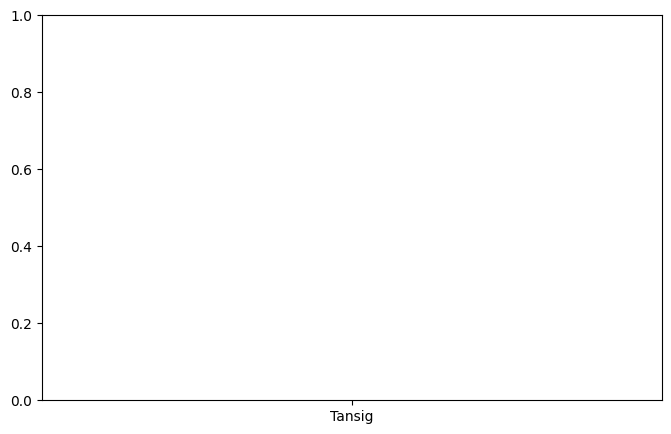

In [33]:
plt.figure(figsize=(8, 5))
plt.plot(list(transfer_functions.values()), mse_results, marker='o', linestyle='-', color='blue')
plt.title('Mean MAPE of Mw vs Transfer Function (Keras ANN)')
plt.xlabel('Transfer Function')
plt.ylabel('Mean MAPE of Mw')
plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
# Step 16: Import additional libraries and implement SVM comparison  
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import (mean_squared_error, r2_score, mean_absolute_error, 
                           explained_variance_score, mean_squared_log_error, 
                           median_absolute_error)


# SVM Implementation
svm_model = MultiOutputRegressor(SVR(kernel='rbf', C=1.0, gamma='scale'))
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

# Calculate max error manually for multi-output
def multi_output_max_error(y_true, y_pred):
    return np.max(np.abs(y_true - y_pred))

# SVM Results in your requested format (fixed for multi-output)
svm_results = {
    "Explained Variance": explained_variance_score(y_test, y_pred_svm),
    "Max Error": multi_output_max_error(y_test, y_pred_svm),
   "MAPE": mean_absolute_percentage_error(y_test, y_pred_svm),
"MSE" : mean_squared_error(y_test, y_pred_svm),
    "MSLE": mean_squared_log_error(y_test, y_pred_svm),
    "Median AE": median_absolute_error(y_test, y_pred_svm),
    "R²": r2_score(y_test, y_pred_svm)
}

print("SVM Results:")
for metric, value in svm_results.items():
    print(f"{metric}: {value:.6f}")

SVM Results:
Explained Variance: 0.003062
Max Error: 2763.638041
MAPE: 0.341627
MSE: 1429038.677333
MSLE: 0.190070
Median AE: 326.085115
R²: -0.027201


In [35]:
# Show how many samples in each set
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples") 
print(f"Test set: {X_test.shape[0]} samples")
print(f"Total: {X_train.shape[0] + X_val.shape[0] + X_test.shape[0]} samples")

# Predictions for all sets
print(f"\nTest predictions shape: {y_pred_svm.shape}")
# Show actual vs predicted comparison
comparison = pd.DataFrame({
    'Actual_Mn': y_test[:, 0],
    'Actual_Mw': y_test[:, 1], 
    'Predicted_Mn': y_pred_svm[:, 0],
    'Predicted_Mw': y_pred_svm[:, 1]
})
print("Actual vs Predicted Comparison:")
print(comparison)

Training set: 17 samples
Validation set: 3 samples
Test set: 5 samples
Total: 25 samples

Test predictions shape: (5, 2)
Actual vs Predicted Comparison:
   Actual_Mn  Actual_Mw  Predicted_Mn  Predicted_Mw
0    2298.62    2972.98   2325.482342   2989.203673
1    3762.88    5752.81   2325.492985   2989.171959
2    1127.19    1321.65   2319.746374   2984.434526
3    2955.83    2966.91   2324.852084   2988.102314
4    2322.83    2987.31   2322.860000   2987.280000


In [36]:
#cross validation
# Import required libraries for cross validation
import numpy as np
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer

print("\n" + "="*60)
print("5-FOLD CROSS VALIDATION RESULTS")
print("="*60)

# Create 5-fold cross validator
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Use all data (combine train, val, test for proper CV)
X_all = np.vstack([X_train, X_val, X_test])
y_all = np.vstack([y_train, y_val, y_test])

# Create new SVM model for CV
svm_cv_model = MultiOutputRegressor(SVR(kernel='rbf', C=1.0, gamma='scale'))

# Perform cross validation
cv_r2 = cross_val_score(svm_cv_model, X_all, y_all, cv=kf, scoring='r2')
cv_neg_mse = cross_val_score(svm_cv_model, X_all, y_all, cv=kf, scoring='neg_mean_squared_error')
cv_neg_mape = cross_val_score(svm_cv_model, X_all, y_all, cv=kf, scoring='neg_mean_absolute_percentage_error')

# Convert negative scores to positive
cv_mse = -cv_neg_mse
cv_mape = -cv_neg_mape

print("Cross Validation Results (5 folds):")
print(f"R² Mean: {cv_r2.mean():.4f} (±{cv_r2.std():.4f})")
print(f"MSE Mean: {cv_mse.mean():.4f} (±{cv_mse.std():.4f})")
print(f"MAPE Mean: {cv_mape.mean():.4f} (±{cv_mape.std():.4f})")
print()
print(f"Individual R² scores: {cv_r2.round(4)}")
print(f"Individual MSE scores: {cv_mse.round(4)}")
print(f"Individual MAPE scores: {cv_mape.round(4)}")



5-FOLD CROSS VALIDATION RESULTS
Cross Validation Results (5 folds):
R² Mean: -0.1214 (±0.1389)
MSE Mean: 1325148.6408 (±490920.1287)
MAPE Mean: 0.3066 (±0.0975)

Individual R² scores: [-0.1186 -0.0266 -0.0532 -0.3902 -0.0185]
Individual MSE scores: [ 548715.9661 1887880.9202 1410999.389  1021681.0106 1756465.9179]
Individual MAPE scores: [0.3474 0.3935 0.3437 0.1161 0.3324]


In [42]:
# Train final SVM model on all data for comparison
svm_final = MultiOutputRegressor(SVR(kernel='rbf', C=1.0, gamma='scale'))
svm_final.fit(X_all, y_all)

# Get predictions for all data
y_pred_all = svm_final.predict(X_all)

# Simple comparison
print("Actual vs Predicted Comparison (All 25 samples):")

for i in range(len(y_all)):
    print(f"Sample {i+1:2d}: Actual=[{y_all[i,0]:8.2f}, {y_all[i,1]:8.2f}] | Predicted=[{y_pred_all[i,0]:8.2f}, {y_pred_all[i,1]:8.2f}]")

# Or as DataFrame for better visualization
import pandas as pd
comparison_df = pd.DataFrame({
    'Sample': range(1, len(y_all)+1),
    'Actual_Mn': y_all[:, 0],
    'Actual_Mw': y_all[:, 1],
    'Predicted_Mn': y_pred_all[:, 0],
    'Predicted_Mw': y_pred_all[:, 1],
    'Error_Mn': abs(y_all[:, 0] - y_pred_all[:, 0]),
    'Error_Mw': abs(y_all[:, 1] - y_pred_all[:, 1])
})

print("\nDetailed Comparison Table:")
print(comparison_df.round(2))

Actual vs Predicted Comparison (All 25 samples):
Sample  1: Actual=[ 2752.84,  3129.57] | Predicted=[ 2323.93,  2977.46]
Sample  2: Actual=[ 2223.17,  2989.00] | Predicted=[ 2320.39,  2974.99]
Sample  3: Actual=[ 1950.00,  2878.90] | Predicted=[ 2320.39,  2974.99]
Sample  4: Actual=[ 3764.53,  5752.15] | Predicted=[ 2324.86,  2975.81]
Sample  5: Actual=[ 2951.90,  2965.54] | Predicted=[ 2324.50,  2974.80]
Sample  6: Actual=[ 4663.77,  5921.61] | Predicted=[ 2324.55,  2976.69]
Sample  7: Actual=[ 2322.86,  2987.28] | Predicted=[ 2322.75,  2976.80]
Sample  8: Actual=[ 4663.04,  5921.49] | Predicted=[ 2324.55,  2976.69]
Sample  9: Actual=[ 1024.97,  1339.35] | Predicted=[ 2318.64,  2972.14]
Sample 10: Actual=[ 1845.60,  2690.50] | Predicted=[ 2319.81,  2973.09]
Sample 11: Actual=[ 2073.90,  2974.51] | Predicted=[ 2321.19,  2974.51]
Sample 12: Actual=[ 1846.18,  2689.91] | Predicted=[ 2319.81,  2973.09]
Sample 13: Actual=[ 1265.88,  1458.13] | Predicted=[ 2318.61,  2971.96]
Sample 14: Actu